Αφροδίτη Αβραμίδου, ΑΕΜ: 10329

Αθηνά Αποστολίδου,   ΑΕΜ: 10400


## ΜΕΡΟΣ Δ


In [ ]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 1. Φόρτωση δεδομένων
data = pd.read_csv('datasetTV.csv', header=None)
X = data.iloc[:, :-1].values  # Όλα τα χαρακτηριστικά
y = data.iloc[:, -1].values   # Ετικέτες (labels)

# 2. Καθαρισμός και προεπεξεργασία
if data.isnull().values.any():
    data.fillna(data.median(), inplace=True)

# Κανονικοποίηση
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Εφαρμογή PCA για μείωση διαστάσεων
pca = PCA(n_components=0.90)  # Κρατάμε το 90% της συνολικής διακύμανσης
X_pca = pca.fit_transform(X_scaled)

# Χωρισμός δεδομένων σε training και validation set
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Επιβεβαίωση διαστάσεων μετά την εφαρμογή PCA
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")

print(f"Number of features after PCA reduction: {pca.n_components_}")

Shape of X_train: (6994, 162)
Shape of X_val: (1749, 162)
Number of features after PCA reduction: 162


SVM CV Accuracy: 0.85
Best Parameters for SVM: {'C': 5, 'kernel': 'rbf'}
SVM Validation Accuracy: 0.87
SVM Classification Report
              precision    recall  f1-score   support

           1       0.97      0.98      0.97       354
           2       0.78      0.72      0.75       344
           3       0.92      0.95      0.93       351
           4       0.94      0.92      0.93       343
           5       0.76      0.80      0.78       357

    accuracy                           0.87      1749
   macro avg       0.87      0.87      0.87      1749
weighted avg       0.87      0.87      0.87      1749



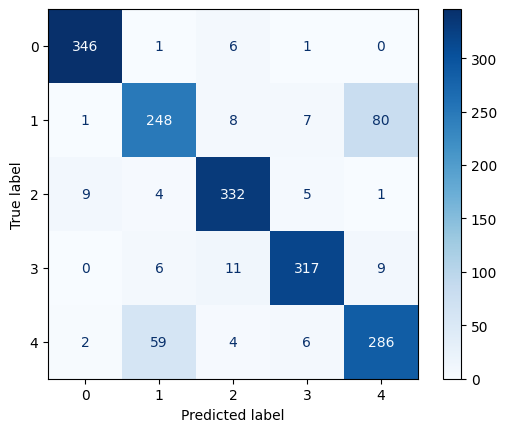

In [ ]:
# Support Vector Machines
svm = SVC(probability=True, random_state=42)
svm_params = {'C': [0.1, 1, 5, 10, 15], 'kernel': ['rbf', 'poly']}

svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)
svm_best = svm_grid.best_estimator_
svm_best_params = svm_grid.best_params_
svm_cv_score = cross_val_score(svm_best, X_train, y_train, cv=5, scoring='accuracy').mean()
print(f"SVM CV Accuracy: {svm_cv_score:.2f}")
print(f"Best Parameters for SVM: {svm_best_params}")

svm_pred = svm_best.predict(X_val)
svm_val_accuracy = accuracy_score(y_val, svm_pred)
print(f"SVM Validation Accuracy: {svm_val_accuracy:.2f}")

# Υπολογισμός του confusion matrix
svm_conf_matrix = confusion_matrix(y_val, svm_pred)

# Οπτικοποίηση του confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=svm_conf_matrix)
disp.plot(cmap='Blues')  # Set the color map to 'Blues'

print("SVM Classification Report")
print(classification_report(y_val, svm_pred))

KNN CV Accuracy: 0.83
Best Parameters for KNN: {'n_neighbors': 9, 'weights': 'distance'}
KNN Validation Accuracy: 0.83
KNN Classification Report
              precision    recall  f1-score   support

           1       0.92      0.97      0.95       354
           2       0.78      0.53      0.63       344
           3       0.91      0.91      0.91       351
           4       0.94      0.88      0.91       343
           5       0.65      0.86      0.74       357

    accuracy                           0.83      1749
   macro avg       0.84      0.83      0.83      1749
weighted avg       0.84      0.83      0.83      1749



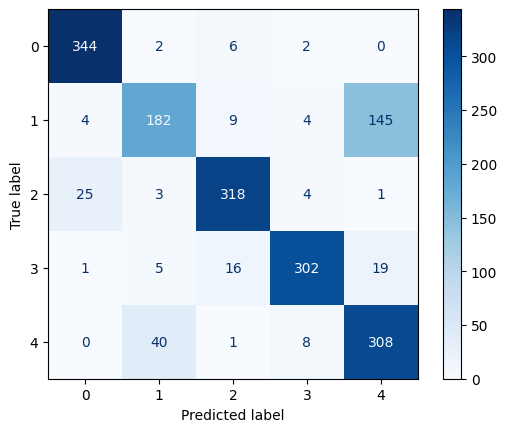

In [ ]:
# Nearest Neighbors
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train, y_train)
knn_best = knn_grid.best_estimator_
knn_best_params = knn_grid.best_params_
knn_cv_score = cross_val_score(knn_best, X_train, y_train, cv=5, scoring='accuracy').mean()
print(f"KNN CV Accuracy: {knn_cv_score:.2f}")
print(f"Best Parameters for KNN: {knn_best_params}")

knn_pred = knn_best.predict(X_val)
knn_val_accuracy = accuracy_score(y_val, knn_pred)
print(f"KNN Validation Accuracy: {knn_val_accuracy:.2f}")

# Υπολογισμός του confusion matrix
knn_conf_matrix = confusion_matrix(y_val, knn_pred)

# Οπτικοποίηση του confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=knn_conf_matrix)
disp.plot(cmap='Blues')  # Set the color map to 'Blues'

print("KNN Classification Report")
print(classification_report(y_val, knn_pred))

NCC CV Accuracy: 0.68
Best Parameters for NCC: {'metric': 'manhattan'}
NCC Validation Accuracy: 0.70
NCC Classification Report
              precision    recall  f1-score   support

           1       0.83      0.85      0.84       354
           2       0.60      0.62      0.61       344
           3       0.75      0.68      0.72       351
           4       0.71      0.81      0.76       343
           5       0.62      0.57      0.59       357

    accuracy                           0.70      1749
   macro avg       0.70      0.70      0.70      1749
weighted avg       0.70      0.70      0.70      1749



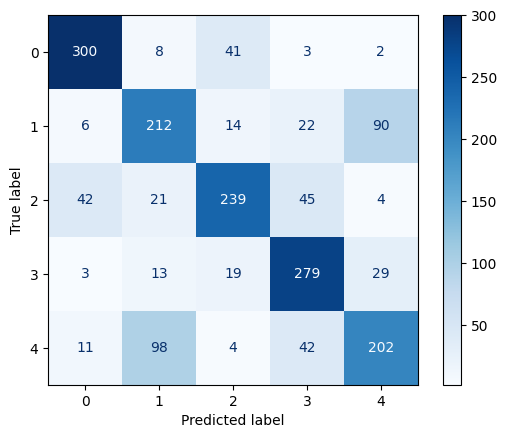

In [ ]:
# Nearest Class Centroid Classifier
ncc = NearestCentroid()
ncc_params = {'metric': ['euclidean', 'manhattan']}

ncc_grid = GridSearchCV(ncc, ncc_params, cv=5, scoring='accuracy', n_jobs=-1)
ncc_grid.fit(X_train, y_train)

ncc_best = ncc_grid.best_estimator_
ncc_best_params = ncc_grid.best_params_

ncc_cv_score = cross_val_score(ncc_best, X_train, y_train, cv=5, scoring='accuracy').mean()
print(f"NCC CV Accuracy: {ncc_cv_score:.2f}")
print(f"Best Parameters for NCC: {ncc_best_params}")

ncc_pred = ncc_best.predict(X_val)
ncc_val_accuracy = accuracy_score(y_val, ncc_pred)
print(f"NCC Validation Accuracy: {ncc_val_accuracy:.2f}")

# Υπολογισμός του confusion matrix
ncc_conf_matrix = confusion_matrix(y_val, ncc_pred)

# Οπτικοποίηση του confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=ncc_conf_matrix)
disp.plot(cmap='Blues')  # Set the color map to 'Blues'

print("NCC Classification Report")
print(classification_report(y_val, ncc_pred))

MLP CV Accuracy: 0.85
Best Parameters for MLP: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'solver': 'sgd'}
MLP Validation Accuracy: 0.86
MLP Classification Report
              precision    recall  f1-score   support

           1       0.96      0.97      0.96       354
           2       0.78      0.71      0.74       344
           3       0.92      0.93      0.93       351
           4       0.92      0.91      0.91       343
           5       0.74      0.80      0.77       357

    accuracy                           0.86      1749
   macro avg       0.86      0.86      0.86      1749
weighted avg       0.86      0.86      0.86      1749



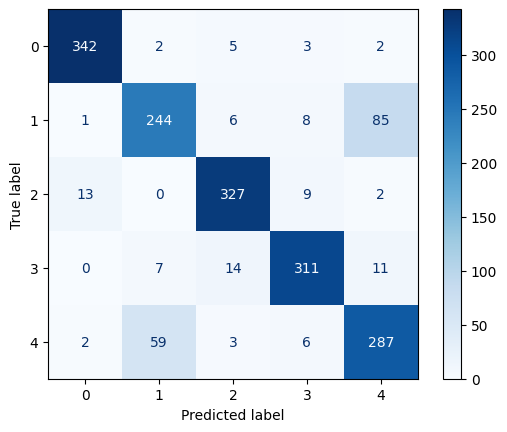

In [ ]:
# MLP Classifier
mlp = MLPClassifier(random_state=42, max_iter=300, early_stopping=False, validation_fraction=0.1)

# Παράμετροι για Grid Search
mlp_params = {
    'hidden_layer_sizes': [(100,), (200,)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.01, 0.1],
}

# Grid Search με Cross-Validation
mlp_grid = GridSearchCV(mlp, mlp_params, cv=5, scoring='accuracy', n_jobs=-1)
mlp_grid.fit(X_train, y_train)

# Βέλτιστες παραμέτροι και cross-validation score
mlp_best = mlp_grid.best_estimator_
mlp_best_params = mlp_grid.best_params_
mlp_cv_score = cross_val_score(mlp_best, X_train, y_train, cv=5, scoring='accuracy').mean()
print(f"MLP CV Accuracy: {mlp_cv_score:.2f}")
print(f"Best Parameters for MLP: {mlp_best_params}")

# Αξιολόγηση στο Validation Set
mlp_pred = mlp_best.predict(X_val)
mlp_val_accuracy = accuracy_score(y_val, mlp_pred)
print(f"MLP Validation Accuracy: {mlp_val_accuracy:.2f}")

# Υπολογισμός του confusion matrix
mlp_conf_matrix = confusion_matrix(y_val, mlp_pred)

# Οπτικοποίηση του confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=mlp_conf_matrix)
disp.plot(cmap='Blues')  # Set the color map to 'Blues'

print("MLP Classification Report")
print(classification_report(y_val, mlp_pred))

Naive Bayes Validation Accuracy: 0.76
Naive Bayes Classification Report
              precision    recall  f1-score   support

           1       0.89      0.93      0.91       354
           2       0.68      0.56      0.62       344
           3       0.80      0.77      0.79       351
           4       0.79      0.85      0.82       343
           5       0.65      0.71      0.68       357

    accuracy                           0.76      1749
   macro avg       0.76      0.76      0.76      1749
weighted avg       0.76      0.76      0.76      1749



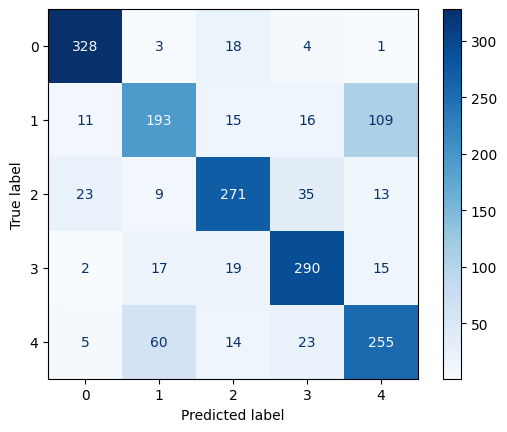

In [ ]:
# 1. Naive Bayes
nb = GaussianNB()

# Εκπαίδευση και αξιολόγηση Naive Bayes
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_val)

nb_val_accuracy = accuracy_score(y_val, nb_pred)
print(f"Naive Bayes Validation Accuracy: {nb_val_accuracy:.2f}")

# Υπολογισμός του confusion matrix
nb_conf_matrix = confusion_matrix(y_val, nb_pred)

# Οπτικοποίηση του confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=nb_conf_matrix)
disp.plot(cmap='Blues')  # Set the color map to 'Blues'

print("Naive Bayes Classification Report")
print(classification_report(y_val, nb_pred))

Random Forest CV Accuracy: 0.79
Best Parameters for Random Forest: {'max_depth': 20, 'n_estimators': 200}
Random Forest Validation Accuracy: 0.81
Random Forest Classification Report
              precision    recall  f1-score   support

           1       0.91      0.96      0.94       354
           2       0.73      0.61      0.66       344
           3       0.86      0.86      0.86       351
           4       0.88      0.86      0.87       343
           5       0.67      0.76      0.71       357

    accuracy                           0.81      1749
   macro avg       0.81      0.81      0.81      1749
weighted avg       0.81      0.81      0.81      1749



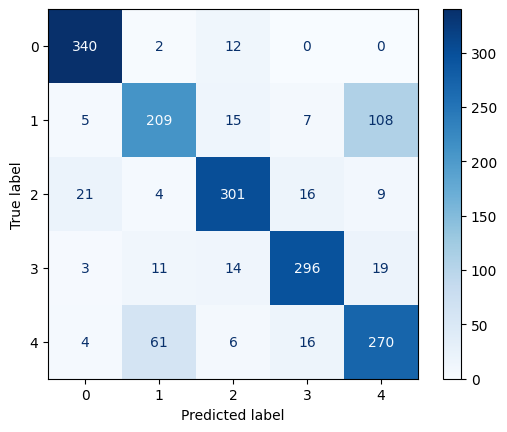

In [ ]:
# Random Forest
rf = RandomForestClassifier(random_state=42,  bootstrap=True)
#rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30, None]}
rf_params = {'n_estimators': [200], 'max_depth': [20, 30, None]}

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
rf_best_params = rf_grid.best_params_
rf_cv_score = cross_val_score(rf_best, X_train, y_train, cv=5, scoring='accuracy').mean()
print(f"Random Forest CV Accuracy: {rf_cv_score:.2f}")
print(f"Best Parameters for Random Forest: {rf_best_params}")

rf_pred = rf_best.predict(X_val)
rf_val_accuracy = accuracy_score(y_val, rf_pred)
print(f"Random Forest Validation Accuracy: {rf_val_accuracy:.2f}")

# Υπολογισμός του confusion matrix
rf_conf_matrix = confusion_matrix(y_val, rf_pred)

# Οπτικοποίηση του confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=rf_conf_matrix)
disp.plot(cmap='Blues')  # Set the color map to 'Blues'

print("Random Forest Classification Report")
print(classification_report(y_val, rf_pred))

Voting Classifier with Naive Bayes Validation Accuracy: 0.87
Voting Classifier with Naive Bayes Classification Report
              precision    recall  f1-score   support

           1       0.94      0.97      0.96       354
           2       0.78      0.73      0.75       344
           3       0.91      0.94      0.92       351
           4       0.95      0.91      0.93       343
           5       0.77      0.79      0.78       357

    accuracy                           0.87      1749
   macro avg       0.87      0.87      0.87      1749
weighted avg       0.87      0.87      0.87      1749



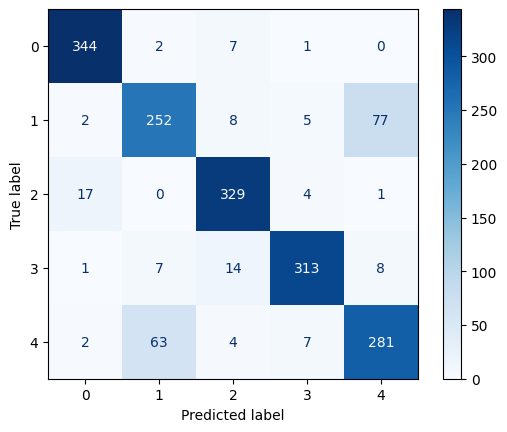

In [ ]:
# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('svm', svm_best),
        ('rf', rf_best),
        ('knn', knn_best),
        ('mlp', mlp_best),
        #('nb', nb)
    ],
    voting='hard'
)

# Εκπαίδευση και αξιολόγηση του Voting Classifier
voting_clf.fit(X_train, y_train)
voting_pred = voting_clf.predict(X_val)
voting_val_accuracy = accuracy_score(y_val, voting_pred)

print(f"Voting Classifier with Naive Bayes Validation Accuracy: {voting_val_accuracy:.2f}")

# Υπολογισμός του confusion matrix
voting_conf_matrix = confusion_matrix(y_val, voting_pred)

# Οπτικοποίηση του confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=voting_conf_matrix)
disp.plot(cmap='Blues')  # Set the color map to 'Blues'

print("Voting Classifier with Naive Bayes Classification Report")
print(classification_report(y_val, voting_pred))

Stacking Classifier Validation Accuracy: 0.87
Stacking Classifier Classification Report
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       354
           2       0.80      0.68      0.73       344
           3       0.93      0.96      0.94       351
           4       0.94      0.92      0.93       343
           5       0.74      0.83      0.79       357

    accuracy                           0.87      1749
   macro avg       0.87      0.87      0.87      1749
weighted avg       0.87      0.87      0.87      1749



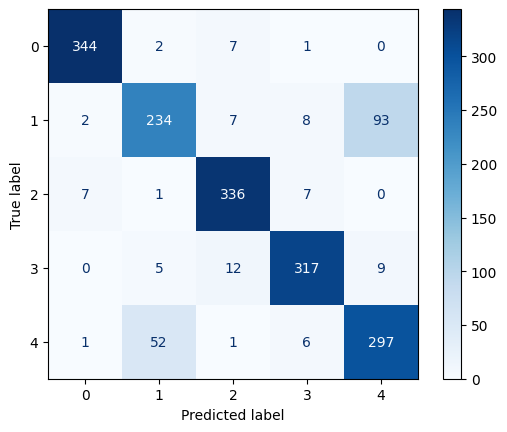

In [ ]:
# StackingClassifier
stacking_clf = StackingClassifier(
    estimators=[
        ('svm', svm_best),
       #('rf', rf_best),
        ('knn', knn_best),
        ('mlp', mlp_best),
       #('nb', nb)
    ],
    final_estimator=RandomForestClassifier(random_state=42),  # Meta-model
    cv=5  # Cross-validation για την εκπαίδευση του meta-model
)

# Βήμα 4: Εκπαίδευση του StackingClassifier
stacking_clf.fit(X_train, y_train)

# Βήμα 5: Πρόβλεψη στο Validation Set
stacking_pred = stacking_clf.predict(X_val)

# Βήμα 6: Αξιολόγηση του μοντέλου
stacking_accuracy = accuracy_score(y_val, stacking_pred)
print(f"Stacking Classifier Validation Accuracy: {stacking_accuracy:.2f}")

# Υπολογισμός του confusion matrix
stacking_conf_matrix = confusion_matrix(y_val, stacking_pred)

# Οπτικοποίηση του confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=stacking_conf_matrix)
disp.plot(cmap='Blues')  # Set the color map to 'Blues'

print("Stacking Classifier Classification Report")
print(classification_report(y_val, stacking_pred))

Final Model Accuracy: 0.87
Final Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       354
           2       0.79      0.67      0.73       344
           3       0.91      0.95      0.93       351
           4       0.94      0.93      0.93       343
           5       0.74      0.82      0.78       357

    accuracy                           0.87      1749
   macro avg       0.87      0.87      0.87      1749
weighted avg       0.87      0.87      0.87      1749



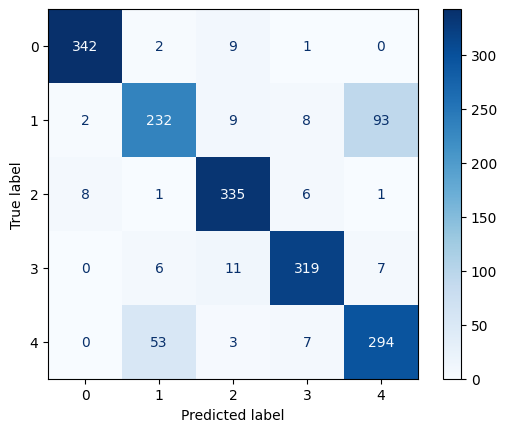

In [ ]:
# Πρόβλεψη στο validation set
general_predictions = stacking_clf.predict(X_val)

# Φιλτράρισμα μόνο για τις κλάσεις 2 και 5
mask_2_5 = (general_predictions == 2) | (general_predictions == 5)
X_2_5 = X_val[mask_2_5]
y_2_5 = y_val[mask_2_5]

# 2ος γύρος: Ταξινόμηση μεταξύ των κλάσεων 2 και 5
svm_2_5 = SVC(kernel='rbf', probability=True, random_state=42)
svm_2_5.fit(X_train[(y_train == 2) | (y_train == 5)], y_train[(y_train == 2) | (y_train == 5)])

# Πρόβλεψη για τις κλάσεις 2 και 5
predictions_2_5 = svm_2_5.predict(X_2_5)

# Ενημέρωση των γενικών προβλέψεων με τις προβλέψεις του 2ου γύρου
final_predictions = general_predictions.copy()
final_predictions[mask_2_5] = predictions_2_5

# Αξιολόγηση του τελικού μοντέλου
final_accuracy = accuracy_score(y_val, final_predictions)
print(f"Final Model Accuracy: {final_accuracy:.2f}")

# Υπολογισμός του confusion matrix
final_pred_conf_matrix = confusion_matrix(y_val, final_predictions)

# Οπτικοποίηση του confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=final_pred_conf_matrix)
disp.plot(cmap='Blues')  # Set the color map to 'Blues'

print("Final Classification Report:")
print(classification_report(y_val, final_predictions))

In [ ]:
# Εκπαίδευση του StackingClassifier σε ολόκληρο το dataset
stacking_clf_full = StackingClassifier(
    estimators=[
        ('svm', svm_best),
        #('rf', rf_best),
        ('knn', knn_best),
        ('mlp', mlp_best),
        #('nb', nb)
    ],
    final_estimator=RandomForestClassifier(random_state=42),  # Meta-model
    cv=5  # Cross-validation για την εκπαίδευση του meta-model
)

# Εκπαίδευση του StackingClassifier σε ολόκληρο το dataset
stacking_clf_full.fit(X_pca, y)


# 1. Φόρτωση δεδομένων από το datasetTest.csv
test_data = pd.read_csv('datasetTest.csv', header=None)
X_test = test_data.values  # Υποθέτουμε ότι το dataset δεν περιέχει ετικέτες

# 2. Προεπεργασία (όπως στο training set)
X_test_scaled = scaler.transform(X_test)  # Χρήση του ίδιου scaler
X_test_pca = pca.transform(X_test_scaled)  # Χρήση του ίδιου PCA μοντέλου

# 3. Πρόβλεψη με το εκπαιδευμένο μοντέλο
labelsX = stacking_clf_full.predict(X_test_pca)

# 4. Αποθήκευση του διάνυσματος προβλέψεων σε μορφή NumPy
np.save('labelsX.npy', labelsX)
print(f"Predictions saved to labelsX.npy")

# Επιβεβαίωση διαστάσεων του labelsX
print(f"Shape of labelsX: {labelsX.shape}")

FileNotFoundError: [Errno 2] No such file or directory: 'datasetTest.csv'